In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [2]:
fin=pd.read_csv('./data/weather_W.csv',index_col=0)

In [4]:
fin2=fin[['기온(°C)','풍속(m/s)','습도(%)','강수량(mm)','풍향_class','적설(cm)','W','합계']]

In [180]:
fin2.corr().style.background_gradient(cmap = "YlGnBu")

,기온(°C),풍속(m/s),습도(%),강수량(mm),풍향_class,적설(cm),W,합계
기온(°C),1.000000,-0.119200,0.148324,0.023750,-0.203136,-0.263273,0.000000,0.012885
풍속(m/s),-0.119200,1.000000,-0.172073,0.057496,0.189941,0.000571,0.000000,0.039837
습도(%),0.148324,-0.172073,1.000000,0.214062,-0.167717,0.041748,0.000000,-0.054069
강수량(mm),0.023750,0.057496,0.214062,1.000000,-0.064353,-0.001135,-0.000000,-0.015506
풍향_class,-0.203136,0.189941,-0.167717,-0.064353,1.000000,-0.009841,-0.000000,0.050076
적설(cm),-0.263273,0.000571,0.041748,-0.001135,-0.009841,1.000000,0.000000,-0.013000
W,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,1.000000,0.779111
합계,0.012885,0.039837,-0.054069,-0.015506,0.050076,-0.013000,0.779111,1.000000


In [174]:
corr=round(fin2.corr(),2)

<AxesSubplot:>

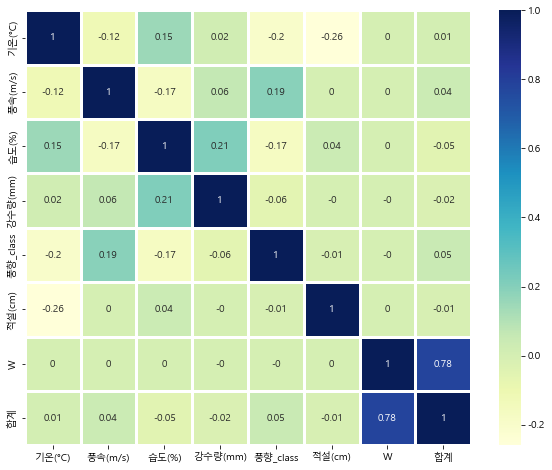

In [178]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap= 'YlGnBu',linewidths=3)

In [169]:
corr_idx

Index(['기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '풍향_class', '적설(cm)', 'W'], dtype='object')

In [104]:
X=fin2.drop(['합계'],axis=1)
X.head()

,기온(°C),풍속(m/s),습도(%),강수량(mm),풍향_class,적설(cm),W
역명,,,,,,,
152종각,-6.1,1.1,68,0.0,2,0.0,0.34049
152종각,-3.2,1.7,55,0.0,3,0.0,0.34049
152종각,-1.1,2.1,52,0.0,9,0.0,0.34049
152종각,-0.2,3.0,56,0.0,11,0.0,0.34049
152종각,1.4,1.6,53,0.0,9,0.0,0.34049


In [106]:
Y=fin2[['합계']]
Y.head()

,합계
역명,
152종각,475.0
152종각,569.0
152종각,740.0
152종각,733.0
152종각,878.0


#### DBSCAN 최적 eps 결정방법 
출처 : https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

In [19]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns

In [25]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [26]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]


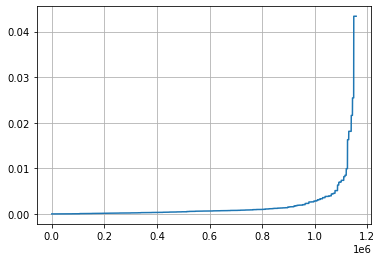

In [27]:
plt.plot(distances)
plt.grid(True)

#### 2차원보다 많은 변수를 가지고 있는 데이터셋의 경우 MinPts = 2 * dim 추천
출처 : https://rfriend.tistory.com/588 

In [108]:
samples=len(X.columns)*2

In [109]:
m = DBSCAN(eps=0.05, min_samples=samples)
m.fit_predict(X)

array([   0,    1,    2, ..., 4740, 4741, 4742], dtype=int64)

In [110]:
clusters = m.labels_

In [111]:
len(clusters)

1157780

In [112]:
pd.Series(clusters).value_counts()

-1       85370
 2728      452
 2664      452
 0         226
 3163      226
         ...  
 1581      226
 1580      226
 1579      226
 4743       20
 4744       20
Length: 4746, dtype: int64

In [113]:
sum(clusters==-1)

85370

In [114]:
data=X[clusters!=-1]

In [115]:
data

,기온(°C),풍속(m/s),습도(%),강수량(mm),풍향_class,적설(cm),W
역명,,,,,,,
152종각,-6.1,1.1,68,0.0,2,0.0,0.340490
152종각,-3.2,1.7,55,0.0,3,0.0,0.340490
152종각,-1.1,2.1,52,0.0,9,0.0,0.340490
152종각,-0.2,3.0,56,0.0,11,0.0,0.340490
152종각,1.4,1.6,53,0.0,9,0.0,0.340490
...,...,...,...,...,...,...,...
2646태릉입구2719태릉입구,-5.9,2.2,32,0.0,10,0.0,0.147197
2646태릉입구2719태릉입구,-6.4,2.2,34,0.0,11,0.0,0.147197
2646태릉입구2719태릉입구,-6.3,4.1,35,0.0,14,0.0,0.147197


In [116]:
tg=Y[clusters!=-1]

In [117]:
fin3=pd.concat([data,tg],axis=1)

In [118]:
fin3

,기온(°C),풍속(m/s),습도(%),강수량(mm),풍향_class,적설(cm),W,합계
역명,,,,,,,,
152종각,-6.1,1.1,68,0.0,2,0.0,0.340490,475.0
152종각,-3.2,1.7,55,0.0,3,0.0,0.340490,569.0
152종각,-1.1,2.1,52,0.0,9,0.0,0.340490,740.0
152종각,-0.2,3.0,56,0.0,11,0.0,0.340490,733.0
152종각,1.4,1.6,53,0.0,9,0.0,0.340490,878.0
...,...,...,...,...,...,...,...,...
2646태릉입구2719태릉입구,-5.9,2.2,32,0.0,10,0.0,0.147197,2220.0
2646태릉입구2719태릉입구,-6.4,2.2,34,0.0,11,0.0,0.147197,1477.0
2646태릉입구2719태릉입구,-6.3,4.1,35,0.0,14,0.0,0.147197,985.0


In [119]:
len(fin2)-len(fin3)

85370

# 모델링 재진행

In [120]:
fin3.head()

,기온(°C),풍속(m/s),습도(%),강수량(mm),풍향_class,적설(cm),W,합계
역명,,,,,,,,
152종각,-6.1,1.1,68,0.0,2,0.0,0.34049,475.0
152종각,-3.2,1.7,55,0.0,3,0.0,0.34049,569.0
152종각,-1.1,2.1,52,0.0,9,0.0,0.34049,740.0
152종각,-0.2,3.0,56,0.0,11,0.0,0.34049,733.0
152종각,1.4,1.6,53,0.0,9,0.0,0.34049,878.0


In [121]:
fin3.skew()

기온(°C)      -0.413898
풍속(m/s)      0.686270
습도(%)        0.222633
강수량(mm)     25.223618
풍향_class    -0.388977
적설(cm)       9.308951
W            0.914702
합계           3.157463
dtype: float64

In [122]:
fin3.skew()>1.5

기온(°C)      False
풍속(m/s)     False
습도(%)       False
강수량(mm)      True
풍향_class    False
적설(cm)       True
W           False
합계           True
dtype: bool

In [123]:
skew=fin3.columns[fin3.skew()>1.5]

In [124]:
skew

Index(['강수량(mm)', '적설(cm)', '합계'], dtype='object')

In [125]:
fin4=fin3.copy()

In [126]:
fin4[skew]=np.log1p(fin4[skew])

In [127]:
fin4

,기온(°C),풍속(m/s),습도(%),강수량(mm),풍향_class,적설(cm),W,합계
역명,,,,,,,,
152종각,-6.1,1.1,68,0.0,2,0.0,0.340490,6.165418
152종각,-3.2,1.7,55,0.0,3,0.0,0.340490,6.345636
152종각,-1.1,2.1,52,0.0,9,0.0,0.340490,6.608001
152종각,-0.2,3.0,56,0.0,11,0.0,0.340490,6.598509
152종각,1.4,1.6,53,0.0,9,0.0,0.340490,6.778785
...,...,...,...,...,...,...,...,...
2646태릉입구2719태릉입구,-5.9,2.2,32,0.0,10,0.0,0.147197,7.705713
2646태릉입구2719태릉입구,-6.4,2.2,34,0.0,11,0.0,0.147197,7.298445
2646태릉입구2719태릉입구,-6.3,4.1,35,0.0,14,0.0,0.147197,6.893656


In [128]:
fin4.skew()

기온(°C)     -0.413898
풍속(m/s)     0.686270
습도(%)       0.222633
강수량(mm)     6.694253
풍향_class   -0.388977
적설(cm)      6.923461
W           0.914702
합계         -0.352558
dtype: float64

In [129]:
X=fin4.drop(['합계'],axis=1)
X.head()

,기온(°C),풍속(m/s),습도(%),강수량(mm),풍향_class,적설(cm),W
역명,,,,,,,
152종각,-6.1,1.1,68,0.0,2,0.0,0.34049
152종각,-3.2,1.7,55,0.0,3,0.0,0.34049
152종각,-1.1,2.1,52,0.0,9,0.0,0.34049
152종각,-0.2,3.0,56,0.0,11,0.0,0.34049
152종각,1.4,1.6,53,0.0,9,0.0,0.34049


In [130]:
Y=fin4[['합계']]
Y.head()

,합계
역명,
152종각,6.165418
152종각,6.345636
152종각,6.608001
152종각,6.598509
152종각,6.778785


In [131]:
from sklearn.model_selection import train_test_split

# train, test 데이터 분리 (8 : 2)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=34)

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
lr=LinearRegression()

In [134]:
lr.fit(X_train,y_train)

LinearRegression()

In [135]:
pred=lr.predict(X_train)

In [136]:
from sklearn.metrics import mean_squared_error,r2_score

In [137]:
mean_squared_error(y_train,pred)

0.2720233844369441

In [138]:
pred_t=lr.predict(X_test)

In [139]:
mean_squared_error(y_test,pred_t)

0.271258173765663

In [140]:
r2_score(y_test,pred_t)

0.58922377585096

## 모든변수 로그변환

In [141]:
fin3

,기온(°C),풍속(m/s),습도(%),강수량(mm),풍향_class,적설(cm),W,합계
역명,,,,,,,,
152종각,-6.1,1.1,68,0.0,2,0.0,0.340490,475.0
152종각,-3.2,1.7,55,0.0,3,0.0,0.340490,569.0
152종각,-1.1,2.1,52,0.0,9,0.0,0.340490,740.0
152종각,-0.2,3.0,56,0.0,11,0.0,0.340490,733.0
152종각,1.4,1.6,53,0.0,9,0.0,0.340490,878.0
...,...,...,...,...,...,...,...,...
2646태릉입구2719태릉입구,-5.9,2.2,32,0.0,10,0.0,0.147197,2220.0
2646태릉입구2719태릉입구,-6.4,2.2,34,0.0,11,0.0,0.147197,1477.0
2646태릉입구2719태릉입구,-6.3,4.1,35,0.0,14,0.0,0.147197,985.0


In [142]:
lx=fin3.copy()

In [143]:
lx=lx.drop(['기온(°C)'],axis=1)

In [144]:
lx=np.log1p(lx)

In [145]:
lx

,풍속(m/s),습도(%),강수량(mm),풍향_class,적설(cm),W,합계
역명,,,,,,,
152종각,0.741937,4.234107,0.0,1.098612,0.0,0.293035,6.165418
152종각,0.993252,4.025352,0.0,1.386294,0.0,0.293035,6.345636
152종각,1.131402,3.970292,0.0,2.302585,0.0,0.293035,6.608001
152종각,1.386294,4.043051,0.0,2.484907,0.0,0.293035,6.598509
152종각,0.955511,3.988984,0.0,2.302585,0.0,0.293035,6.778785
...,...,...,...,...,...,...,...
2646태릉입구2719태릉입구,1.163151,3.496508,0.0,2.397895,0.0,0.137321,7.705713
2646태릉입구2719태릉입구,1.163151,3.555348,0.0,2.484907,0.0,0.137321,7.298445
2646태릉입구2719태릉입구,1.629241,3.583519,0.0,2.708050,0.0,0.137321,6.893656


In [146]:
log=pd.concat([fin3['기온(°C)'],lx],axis=1)

In [147]:
log

,기온(°C),풍속(m/s),습도(%),강수량(mm),풍향_class,적설(cm),W,합계
역명,,,,,,,,
152종각,-6.1,0.741937,4.234107,0.0,1.098612,0.0,0.293035,6.165418
152종각,-3.2,0.993252,4.025352,0.0,1.386294,0.0,0.293035,6.345636
152종각,-1.1,1.131402,3.970292,0.0,2.302585,0.0,0.293035,6.608001
152종각,-0.2,1.386294,4.043051,0.0,2.484907,0.0,0.293035,6.598509
152종각,1.4,0.955511,3.988984,0.0,2.302585,0.0,0.293035,6.778785
...,...,...,...,...,...,...,...,...
2646태릉입구2719태릉입구,-5.9,1.163151,3.496508,0.0,2.397895,0.0,0.137321,7.705713
2646태릉입구2719태릉입구,-6.4,1.163151,3.555348,0.0,2.484907,0.0,0.137321,7.298445
2646태릉입구2719태릉입구,-6.3,1.629241,3.583519,0.0,2.708050,0.0,0.137321,6.893656


# X,y분할

In [148]:
X_l=log.drop(['합계'],axis=1)
X_l.head()

,기온(°C),풍속(m/s),습도(%),강수량(mm),풍향_class,적설(cm),W
역명,,,,,,,
152종각,-6.1,0.741937,4.234107,0.0,1.098612,0.0,0.293035
152종각,-3.2,0.993252,4.025352,0.0,1.386294,0.0,0.293035
152종각,-1.1,1.131402,3.970292,0.0,2.302585,0.0,0.293035
152종각,-0.2,1.386294,4.043051,0.0,2.484907,0.0,0.293035
152종각,1.4,0.955511,3.988984,0.0,2.302585,0.0,0.293035


In [149]:
Y_l=log[['합계']]
Y_l.head()

,합계
역명,
152종각,6.165418
152종각,6.345636
152종각,6.608001
152종각,6.598509
152종각,6.778785


In [150]:
from sklearn.model_selection import train_test_split

# train, test 데이터 분리 (8 : 2)
X_train, X_test, y_train, y_test = train_test_split(X_l, Y_l, test_size=0.2, shuffle=True, random_state=34)

In [151]:
from sklearn.linear_model import LinearRegression

In [152]:
lr=LinearRegression()

In [153]:
lr.fit(X_train,y_train)

LinearRegression()

In [154]:
pred=lr.predict(X_train)

In [155]:
from sklearn.metrics import mean_squared_error,r2_score

In [156]:
mean_squared_error(y_train,pred)

0.2580663793430676

In [157]:
pred_t=lr.predict(X_test)

In [158]:
mean_squared_error(y_test,pred_t)

0.25732680386604695

In [159]:
r2_score(y_test,pred_t)

0.610320561415592

### DBSCAN으로 이상값 제거 후 mse(0.3->0.25)로 감소, but R2 (0.63->0.61)로 감소

# 다항회귀

In [185]:
from sklearn.preprocessing import PolynomialFeatures

In [182]:
X_l.head()

,기온(°C),풍속(m/s),습도(%),강수량(mm),풍향_class,적설(cm),W
역명,,,,,,,
152종각,-6.1,0.741937,4.234107,0.0,1.098612,0.0,0.293035
152종각,-3.2,0.993252,4.025352,0.0,1.386294,0.0,0.293035
152종각,-1.1,1.131402,3.970292,0.0,2.302585,0.0,0.293035
152종각,-0.2,1.386294,4.043051,0.0,2.484907,0.0,0.293035
152종각,1.4,0.955511,3.988984,0.0,2.302585,0.0,0.293035


In [184]:
Y_l.head()

,합계
역명,
152종각,6.165418
152종각,6.345636
152종각,6.608001
152종각,6.598509
152종각,6.778785


#### 2차 다항회귀

In [186]:
p_2=PolynomialFeatures()

In [204]:
p=PolynomialFeatures(degree=2)

In [188]:
poly_2=p_2.fit_transform(X_l)

In [190]:
pd.DataFrame(poly_2)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,-6.1,0.741937,4.234107,0.0,1.098612,0.0,0.293035,37.21,-4.525818,...,0.0,0.0,0.0,0.0,1.206949,0.0,0.321932,0.0,0.0,0.085870
1,1.0,-3.2,0.993252,4.025352,0.0,1.386294,0.0,0.293035,10.24,-3.178406,...,0.0,0.0,0.0,0.0,1.921812,0.0,0.406233,0.0,0.0,0.085870
2,1.0,-1.1,1.131402,3.970292,0.0,2.302585,0.0,0.293035,1.21,-1.244542,...,0.0,0.0,0.0,0.0,5.301898,0.0,0.674739,0.0,0.0,0.085870
3,1.0,-0.2,1.386294,4.043051,0.0,2.484907,0.0,0.293035,0.04,-0.277259,...,0.0,0.0,0.0,0.0,6.174761,0.0,0.728165,0.0,0.0,0.085870
4,1.0,1.4,0.955511,3.988984,0.0,2.302585,0.0,0.293035,1.96,1.337716,...,0.0,0.0,0.0,0.0,5.301898,0.0,0.674739,0.0,0.0,0.085870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072405,1.0,-5.9,1.163151,3.496508,0.0,2.397895,0.0,0.137321,34.81,-6.862590,...,0.0,0.0,0.0,0.0,5.749902,0.0,0.329282,0.0,0.0,0.018857
1072406,1.0,-6.4,1.163151,3.555348,0.0,2.484907,0.0,0.137321,40.96,-7.444165,...,0.0,0.0,0.0,0.0,6.174761,0.0,0.341231,0.0,0.0,0.018857
1072407,1.0,-6.3,1.629241,3.583519,0.0,2.708050,0.0,0.137321,39.69,-10.264215,...,0.0,0.0,0.0,0.0,7.333536,0.0,0.371873,0.0,0.0,0.018857
1072408,1.0,-6.7,1.757858,3.610918,0.0,2.708050,0.0,0.137321,44.89,-11.777648,...,0.0,0.0,0.0,0.0,7.333536,0.0,0.371873,0.0,0.0,0.018857


In [233]:
from sklearn.model_selection import train_test_split

# train, test 데이터 분리 (8 : 2)
X_train, X_test, y_train, y_test = train_test_split(poly_2, Y_l, test_size=0.2, shuffle=True, random_state=34)

In [234]:
model=LinearRegression()

In [235]:
model.fit(X_train,y_train)

LinearRegression()

In [236]:
pred_p=model.predict(X_train)

#### Train데이터 성능

In [237]:
mean_squared_error(y_train,pred_p)

0.20606366739515866

In [238]:
r2_score(y_train,pred_p)

0.6892227389261356

#### Test데이터 성능

In [239]:
pred_pt=model.predict(X_test)

In [240]:
mean_squared_error(y_test,pred_pt)

0.20534477861686853

In [241]:
r2_score(y_test,pred_pt)

0.6890388531413343